#### Importing libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
from sklearn.metrics import r2_score

#### Supress Warnings 

In [ ]:
import warnings
warnings.filterwarnings("ignore")

#### Reading and Understanding the Data

In [3]:
# Reading from csv file

inp0 = pd.read_csv('day.csv')

In [4]:
inp0.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [9]:
#Checking then shape of the dataframe

inp0.shape

(730, 16)

In [5]:
inp0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
# Checking for null values

inp0.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
inp0.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [13]:
# Taking a copy of the dataset

inp1 = inp0.copy()

In [14]:
inp1.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [15]:
# Removing duplicates

inp1 = inp1.drop_duplicates()

In [17]:
# Checking shape of the dataframe

inp1.shape

(730, 16)

#### Droping Unwanted columns 

In [18]:
inp1.drop(['instant','dteday','casual','registered'],axis=1,inplace=True)

In [19]:
inp1.shape

(730, 12)

In [25]:
# renaming few columns for better readibility

inp1.rename(columns={'yr':'year','mnth':'month','hum':'humidity'}, inplace=True)

In [26]:
inp1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Maping and Encoding datas of different columns

In [20]:
# Maping Seasons

def seasons(x):
    if(x==1):
        x="spring"
    elif(x==2):
        x="summer"
    elif(x==3):
        x="fall"
    elif(x==4):
        x="winter"
    return x

In [21]:
inp1['season'] = inp1['season'].apply(seasons)

In [27]:
# Maping Month

def months(x):
    if x == 1:
        return "Jan"
    elif x == 2:
        return "Feb"
    elif x == 3:
        return "Mar"
    elif x == 4:
        return "Apr"
    elif x == 5:
        return "May"
    elif x == 6:
        return "Jun"
    elif x == 7:
        return "Jul"
    elif x == 8:
        return "Aug"
    elif x == 9:
        return "Sep"
    elif x == 10:
        return "Oct"
    elif x == 11:
        return "Nov"
    elif x == 12:
        return "Dec"

In [28]:
inp1['month'] = inp1['month'].apply(months)

In [29]:
# Maping weekday

def weekdays(x):
    if x == 0:
        return "Sunday"
    elif x == 1:
        return "Monday"
    elif x == 2:
        return "Tuesday"
    elif x == 3:
        return "Wednesday"
    elif x == 4:
        return "Thursday"
    elif x == 5:
        return "Friday"
    elif x == 6:
        return "Saturday"

In [31]:
inp1['weekday'] = inp1['weekday'].apply(weekdays)

In [32]:
# Maping weathersit

inp1['weathersit'] = inp1['weathersit'].map({1:'Clear',2:'Misty',3:'Light_snowrain',4:'Heavy_snowrain'})

In [33]:
inp1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [34]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   year        730 non-null    int64  
 2   month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 74.1+ KB


#### Visualising the Data

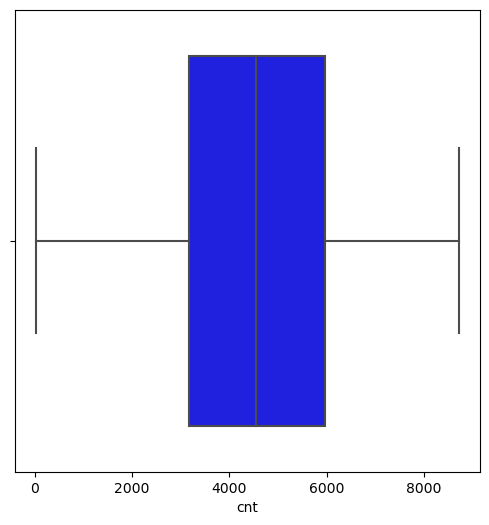

In [36]:
# Outliers Detection of target variable

plt.figure(figsize=(6,6))
sns.boxplot(data=inp1,x=inp1.cnt,color="blue")
plt.show()

In [37]:
list_numerical = ['temp', 'atemp', 'humidity', 'windspeed']

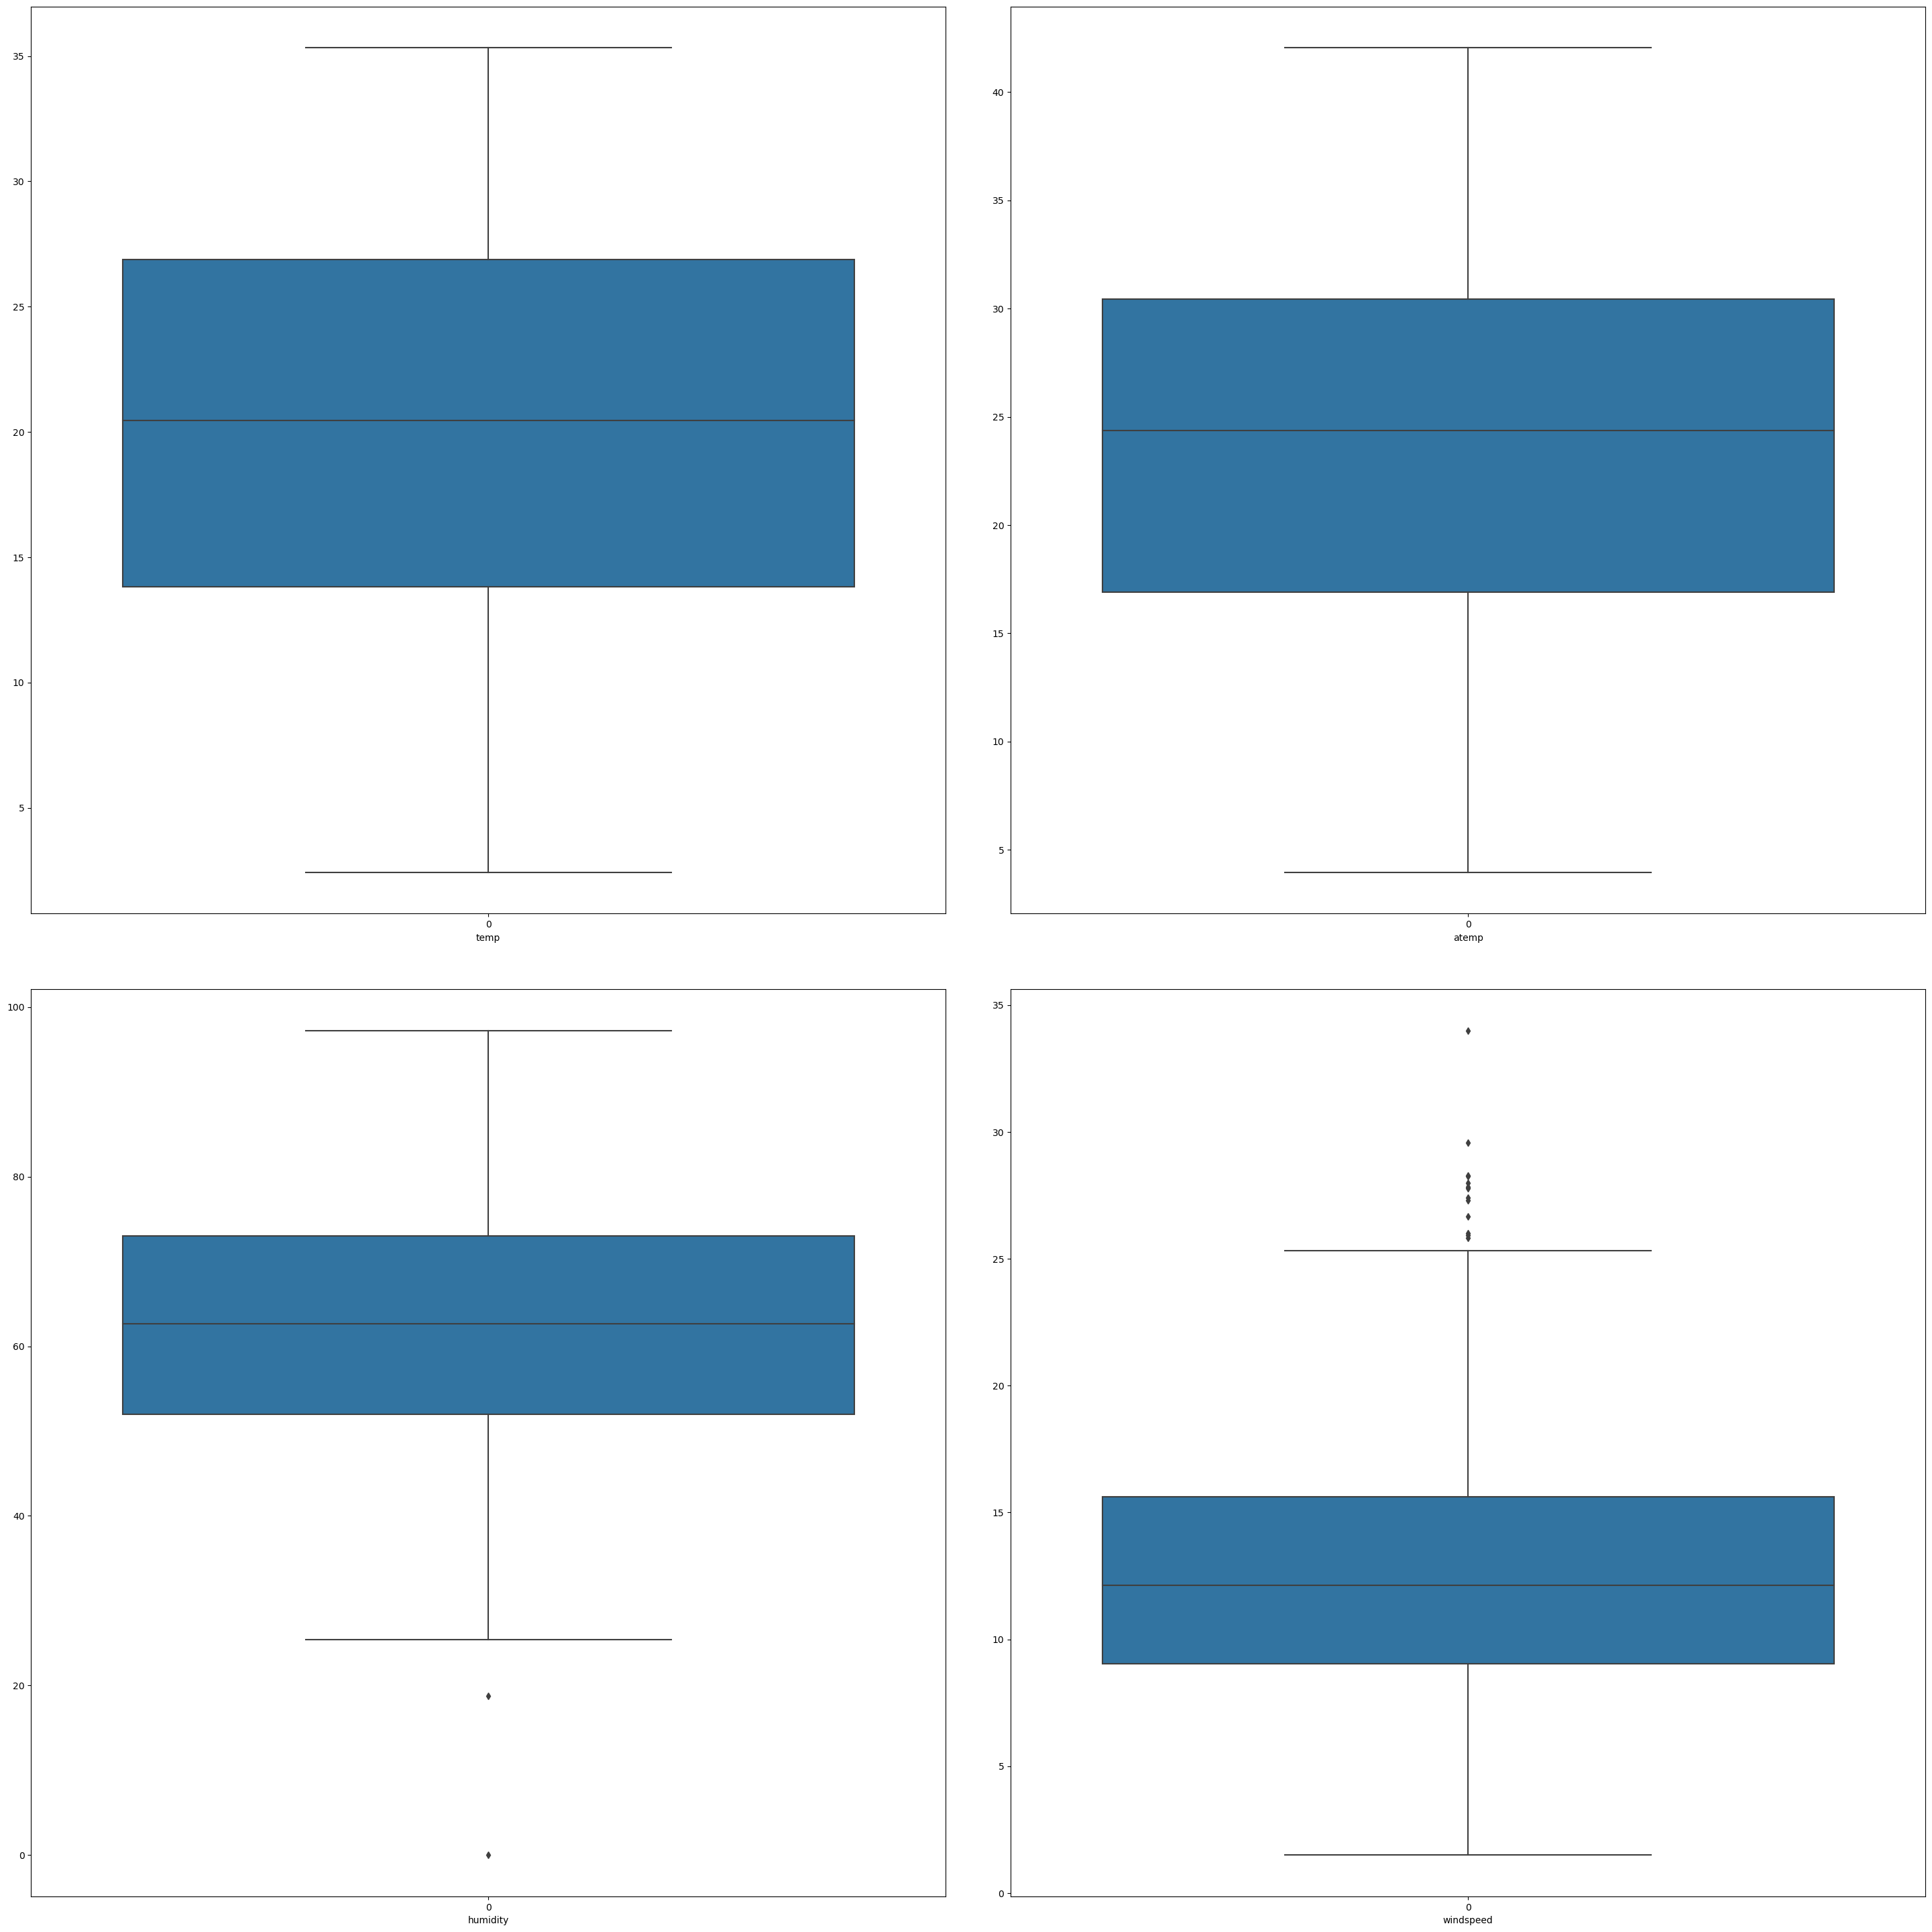

In [40]:
# Outliers Detection of numerical Variables


fig, axes = plt.subplots(2, 2,figsize=(30,30))

for item,ax in zip(list_numerical,axes.flatten()):
    
    sns.boxplot(data=inp1[item],ax=ax)
    ax.set_xlabel(item)

fig.tight_layout(pad=5.0)    
plt.show()

#### Analysing/visualizing the categorical columns

In [41]:
list_categorical = ["season","month","weekday","weathersit","workingday","holiday"]

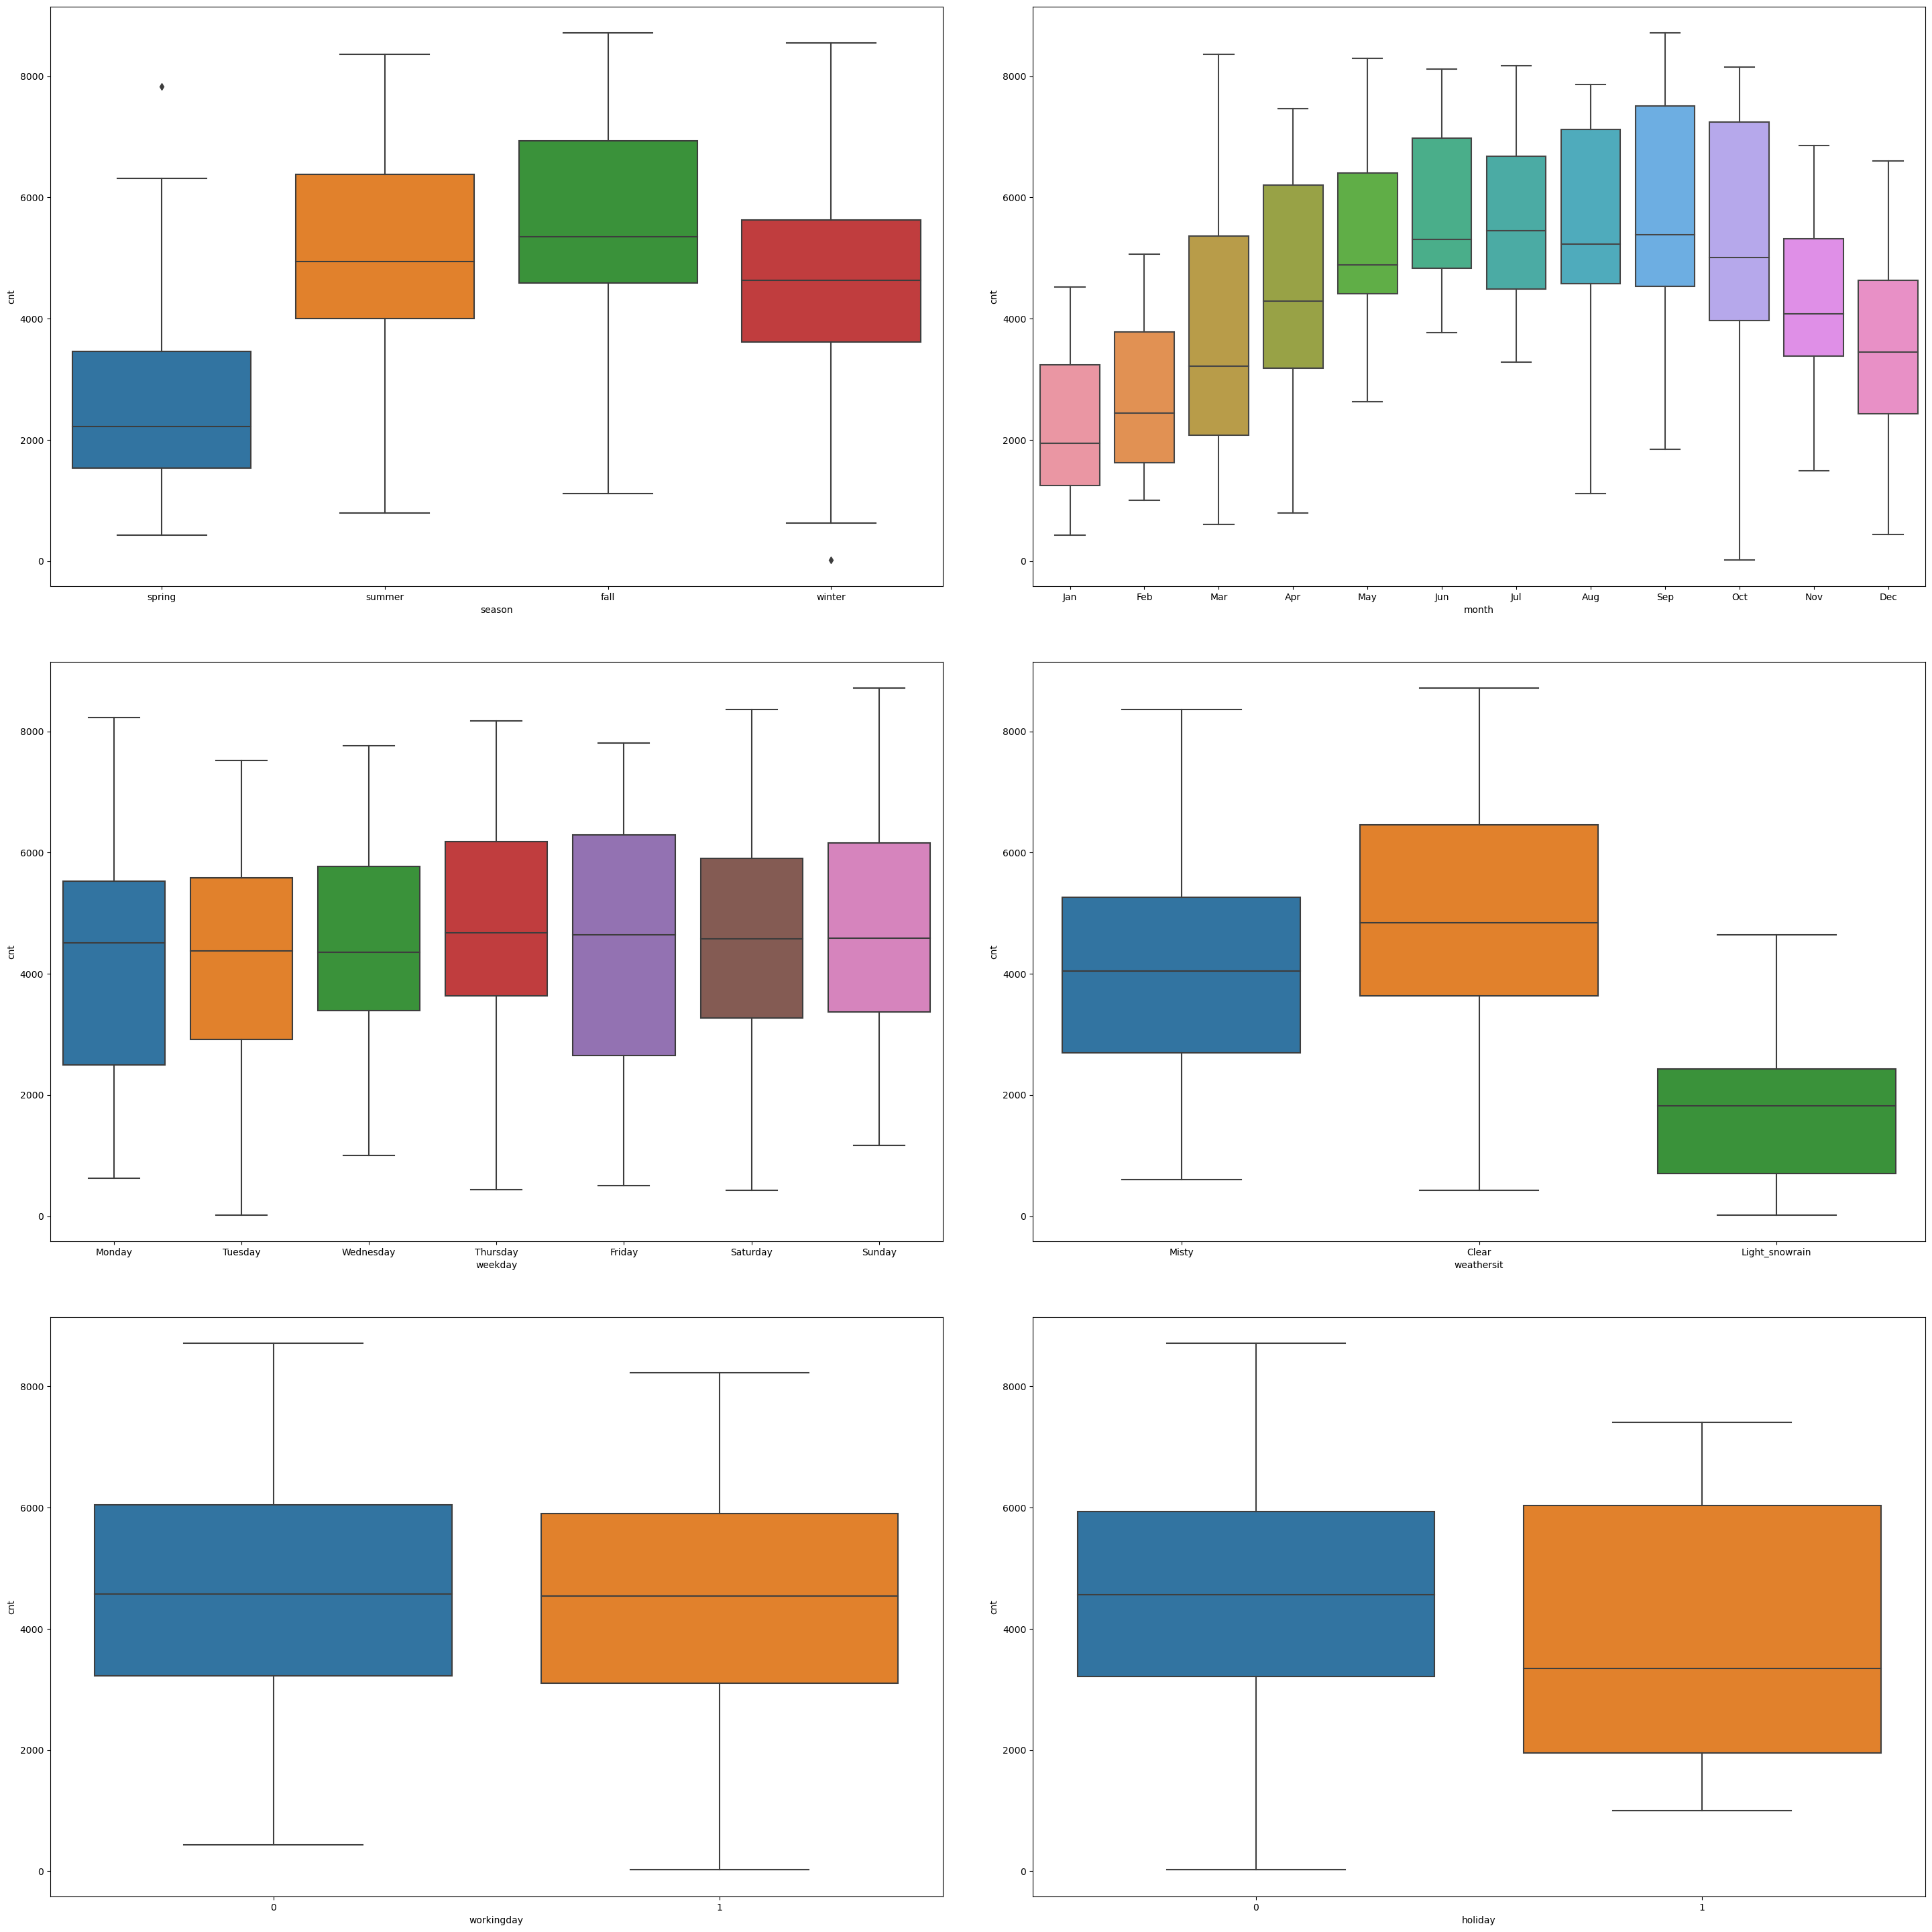

In [43]:
fig, axes = plt.subplots(3, 2,figsize=(30,30))

for item,ax in zip(list_categorical,axes.flatten()):
    
    sns.boxplot(data=inp1,y=inp1["cnt"],x=inp1[item],ax=ax)
    ax.set_xlabel(item)

fig.tight_layout(pad=5.0)    
plt.show()

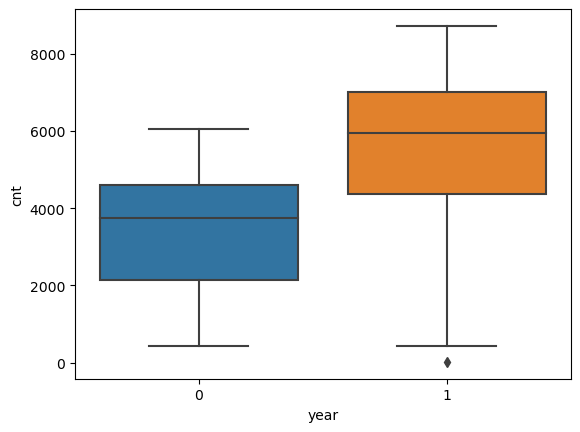

In [44]:
# Ploting year against target variable

sns.boxplot(data=inp1,y=inp1["cnt"],x=inp1['year'])
plt.show()

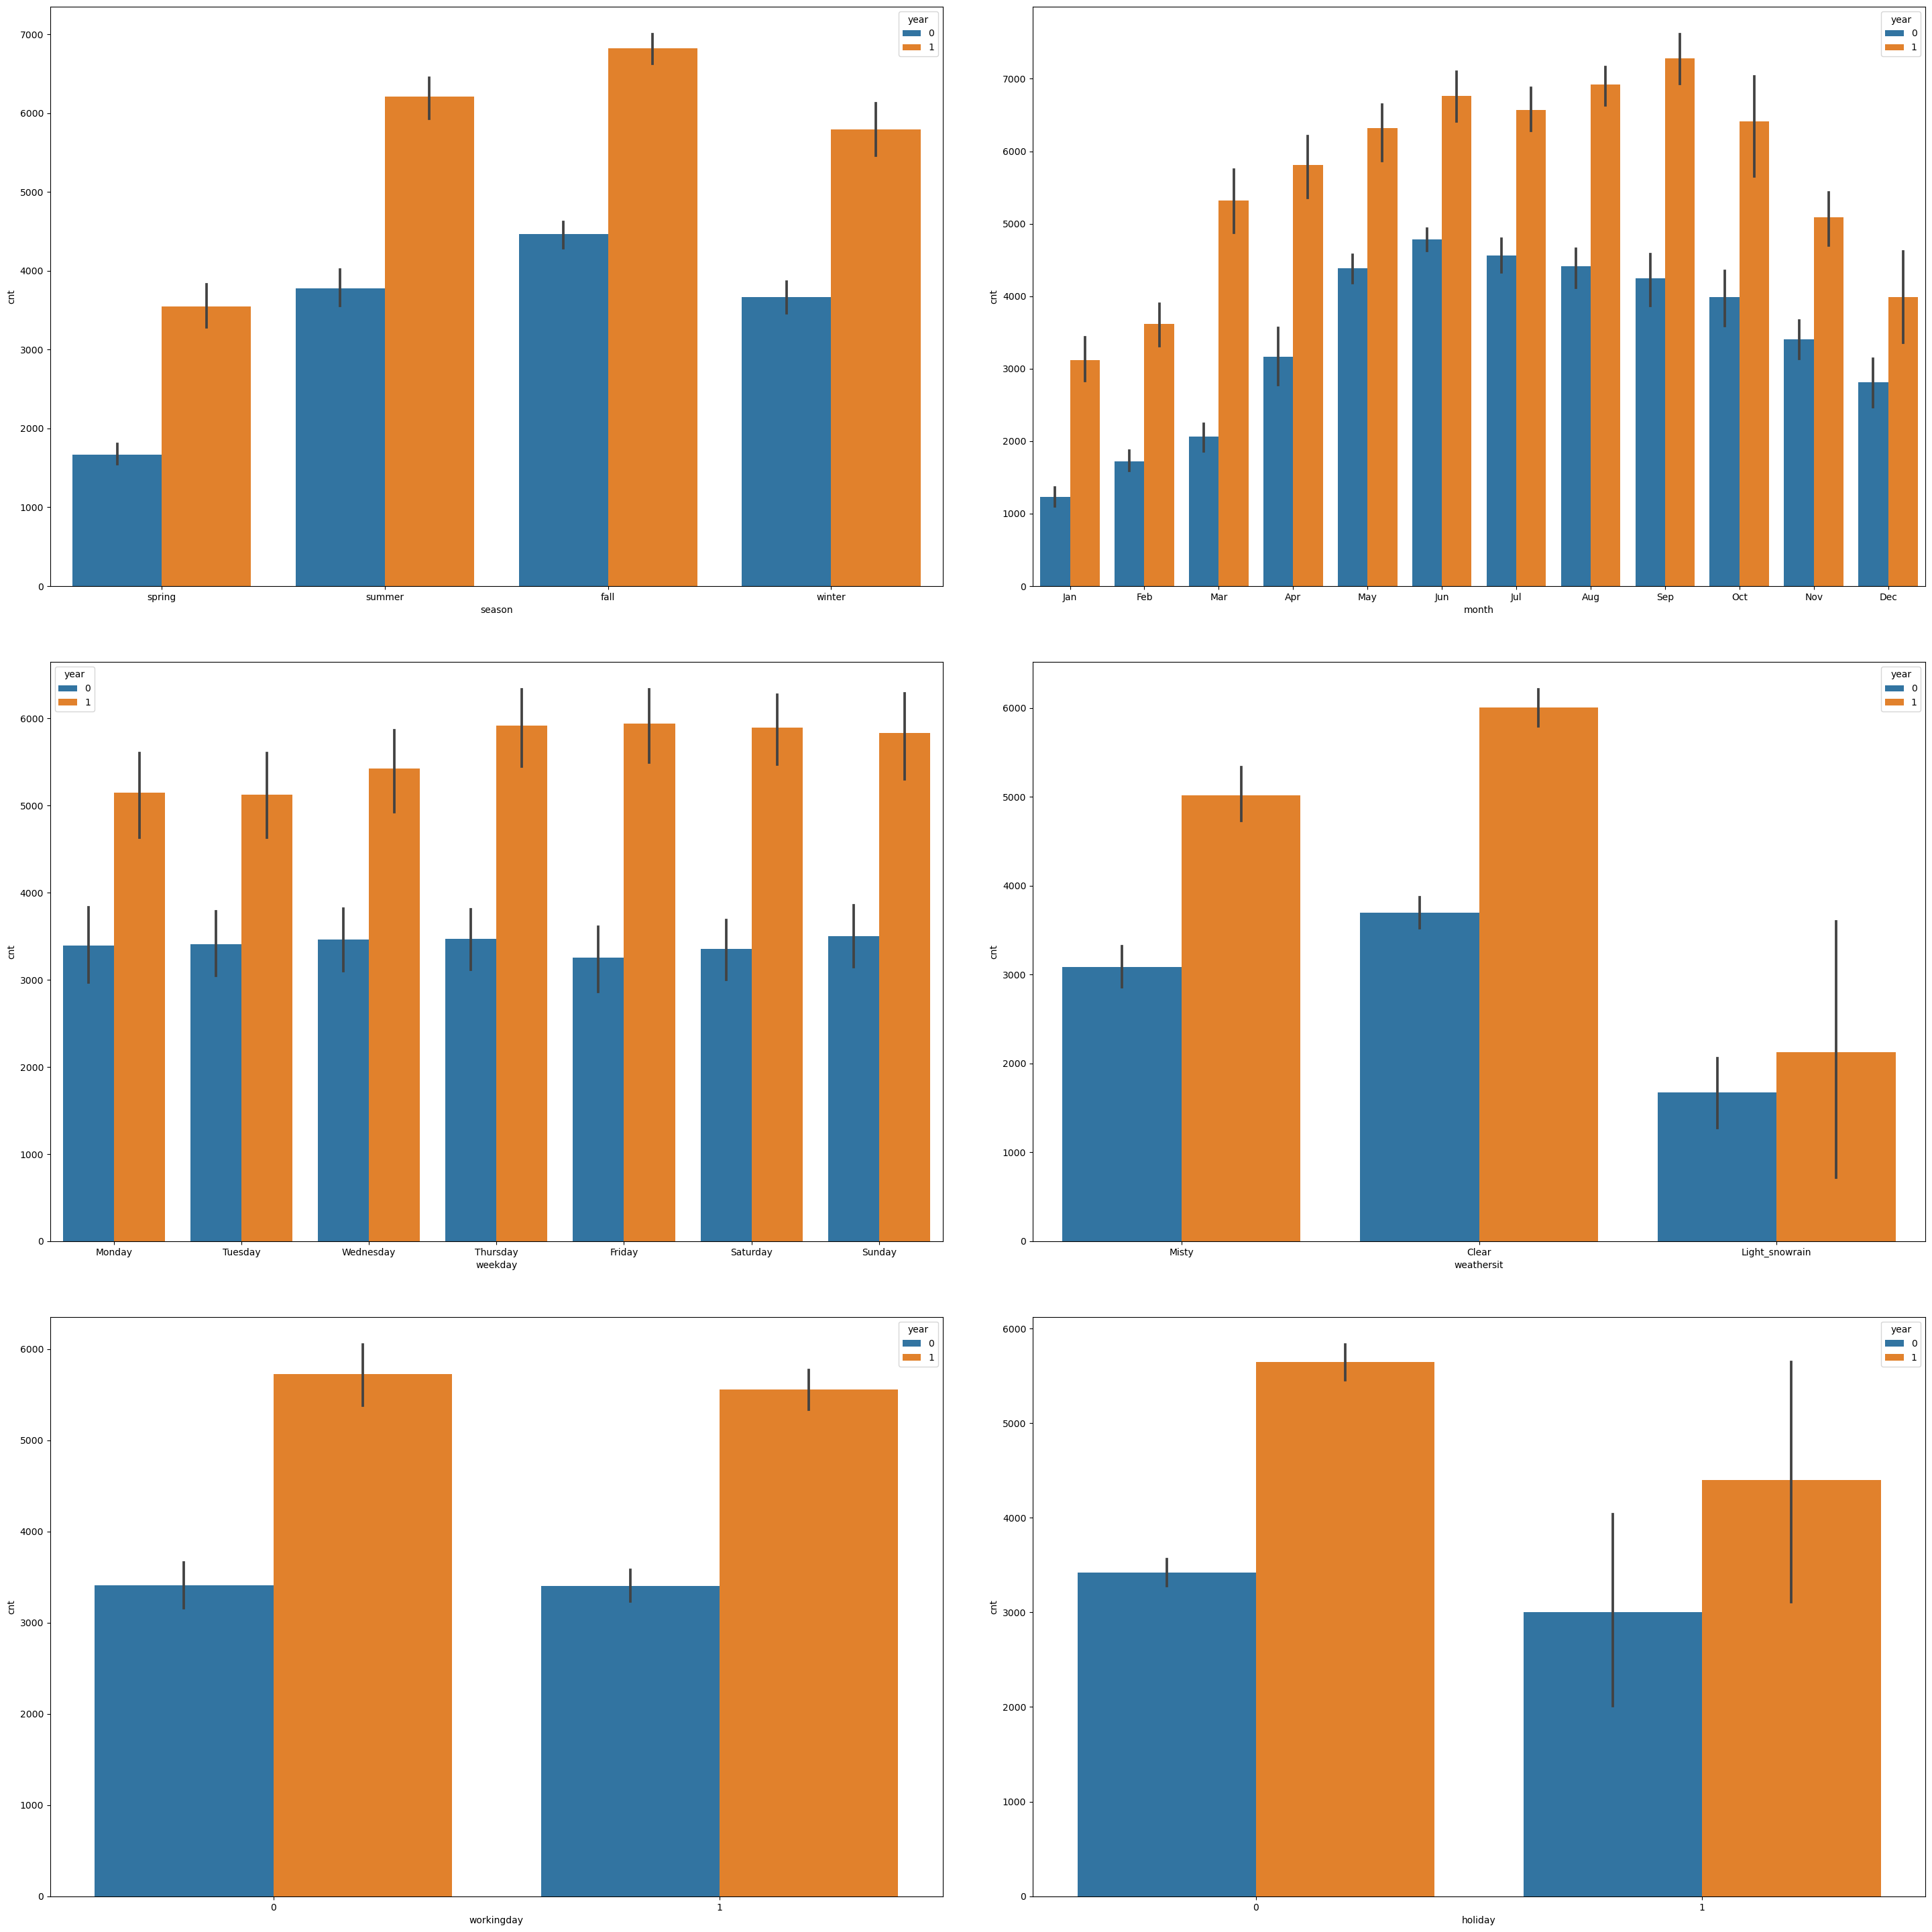

In [45]:
fig, axes = plt.subplots(3, 2,figsize=(30,30))

for item,ax in zip(list_categorical,axes.flatten()):
    
    sns.barplot(data=inp1,y=inp1["cnt"],x=inp1[item],hue=inp1["year"],ax=ax)
    ax.set_xlabel(item)

fig.tight_layout(pad=5.0)    
plt.show()


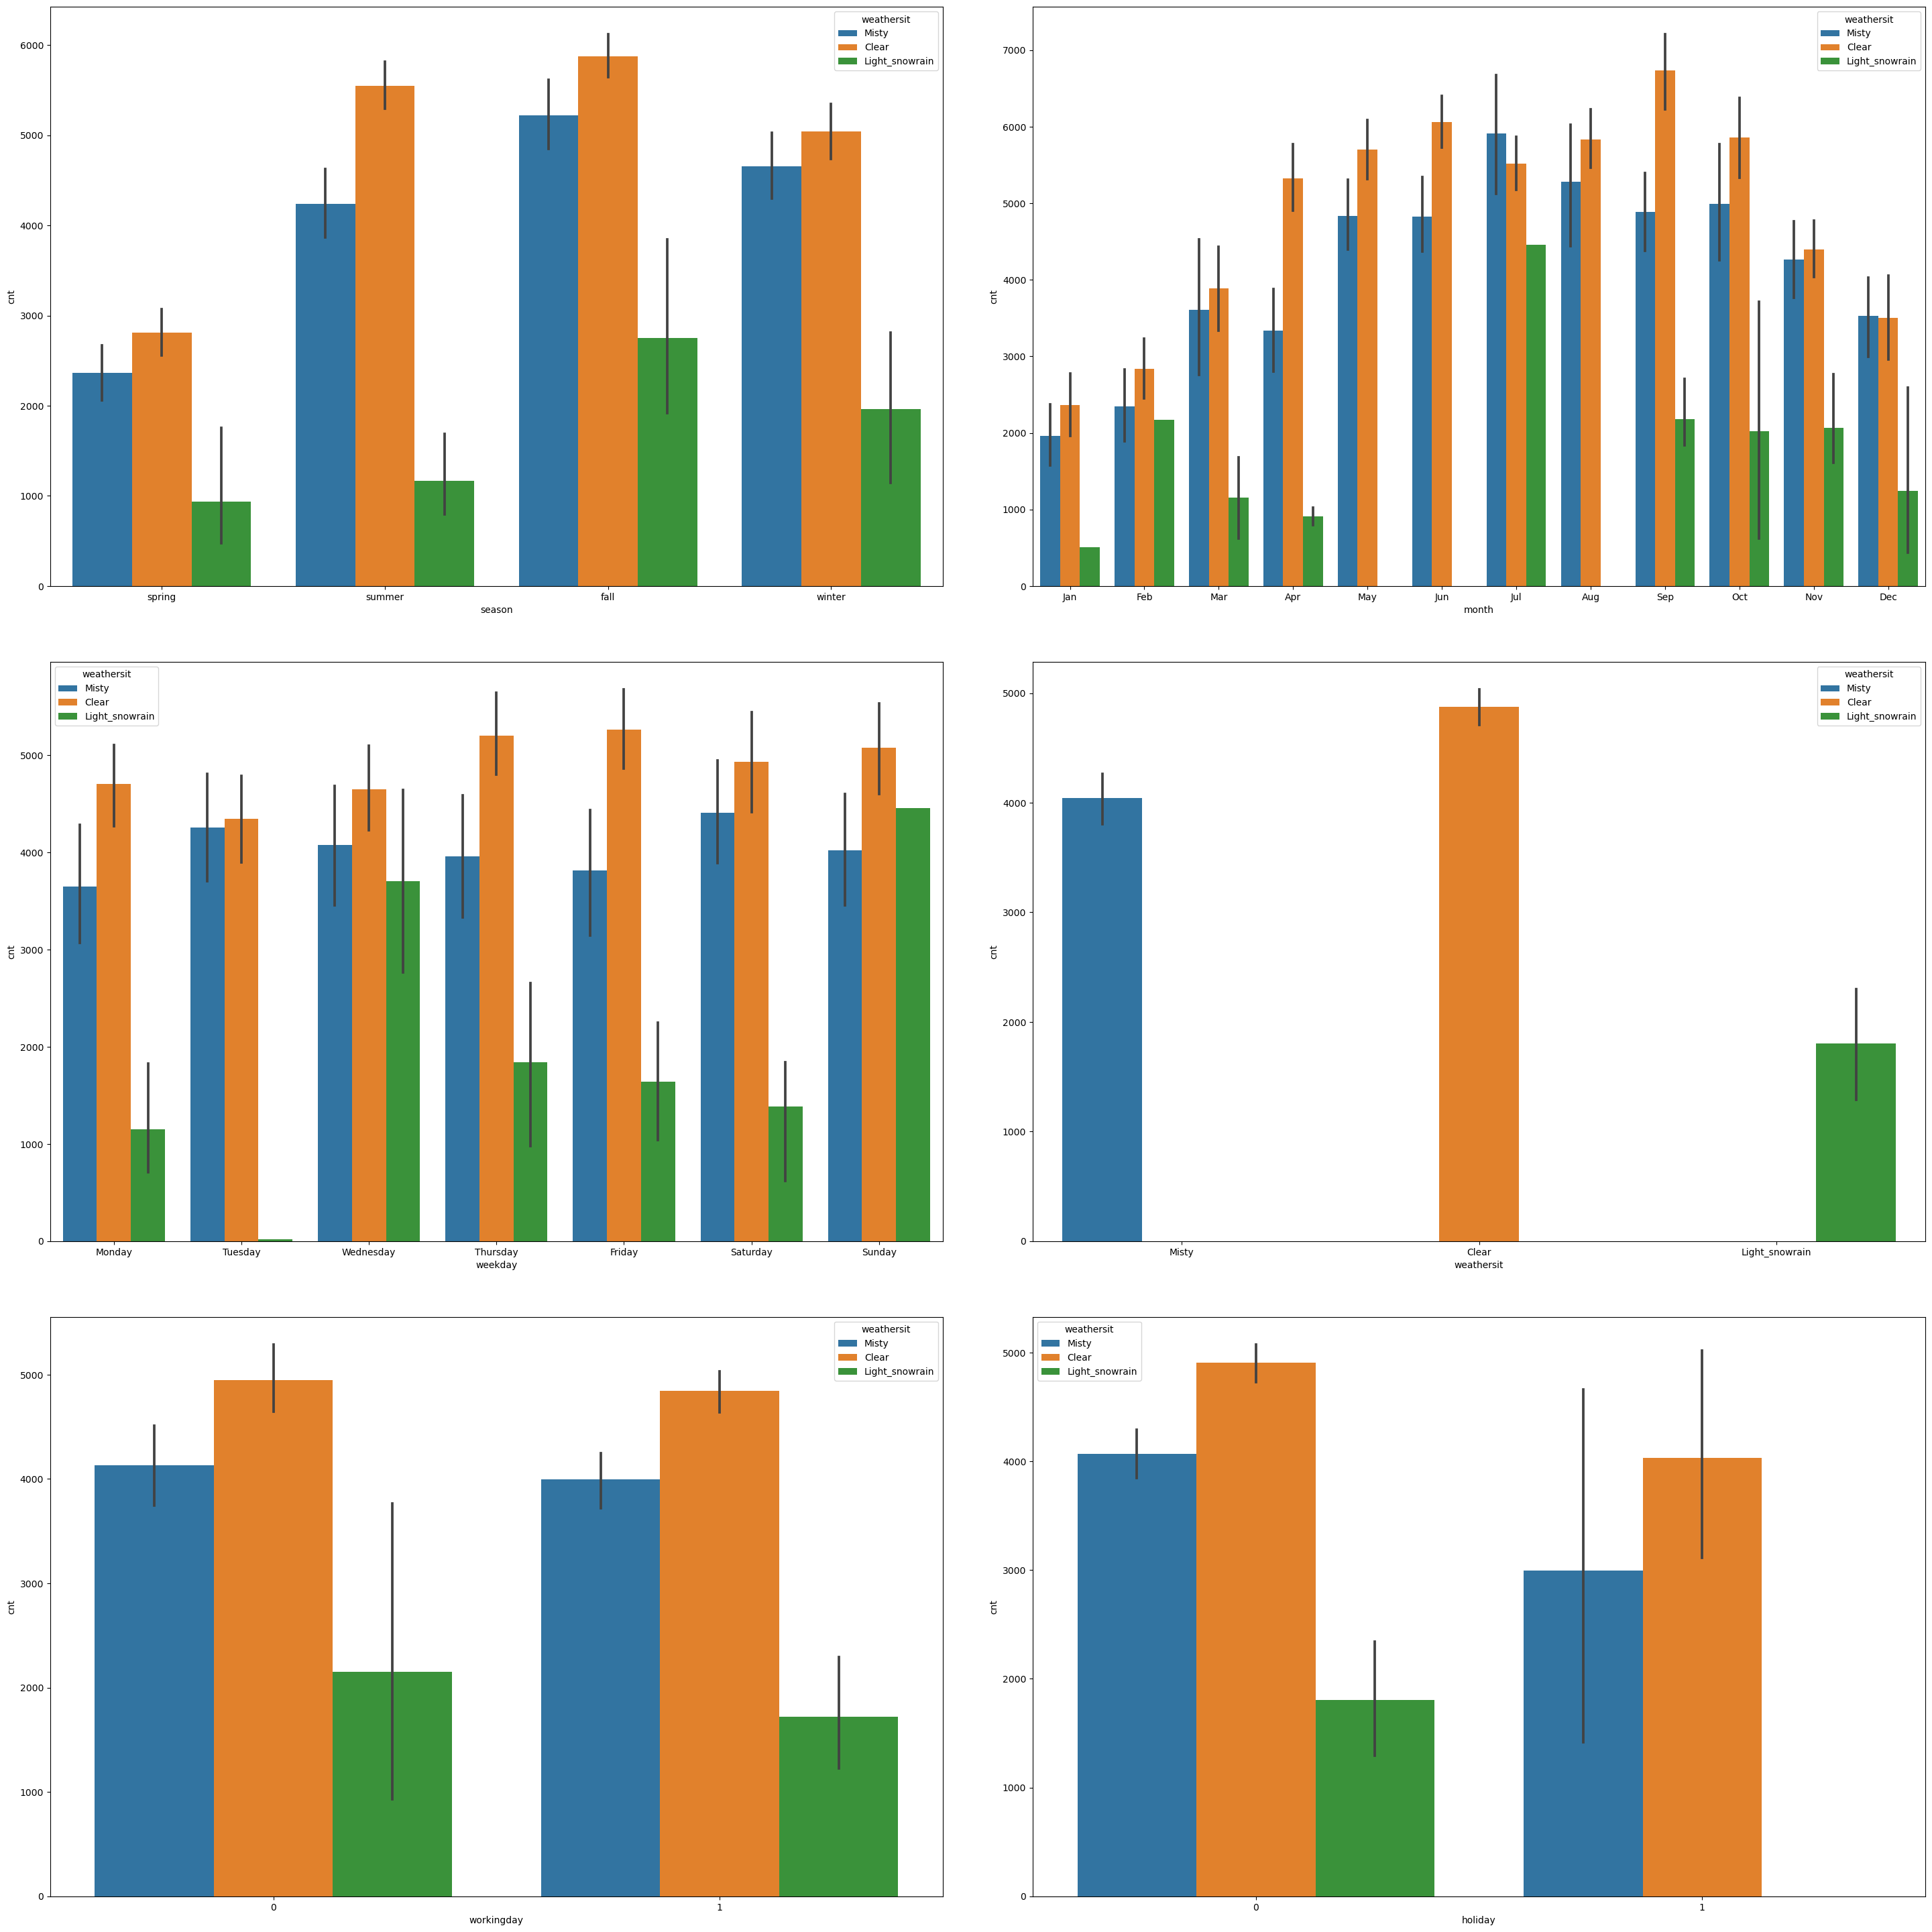

In [46]:
fig, axes = plt.subplots(3, 2,figsize=(30,30))

for item,ax in zip(list_categorical,axes.flatten()):
    
    sns.barplot(data=inp1,y=inp1["cnt"],x=inp1[item],hue=inp1["weathersit"],ax=ax)
    ax.set_xlabel(item)

fig.tight_layout(pad=5.0)    
plt.show()

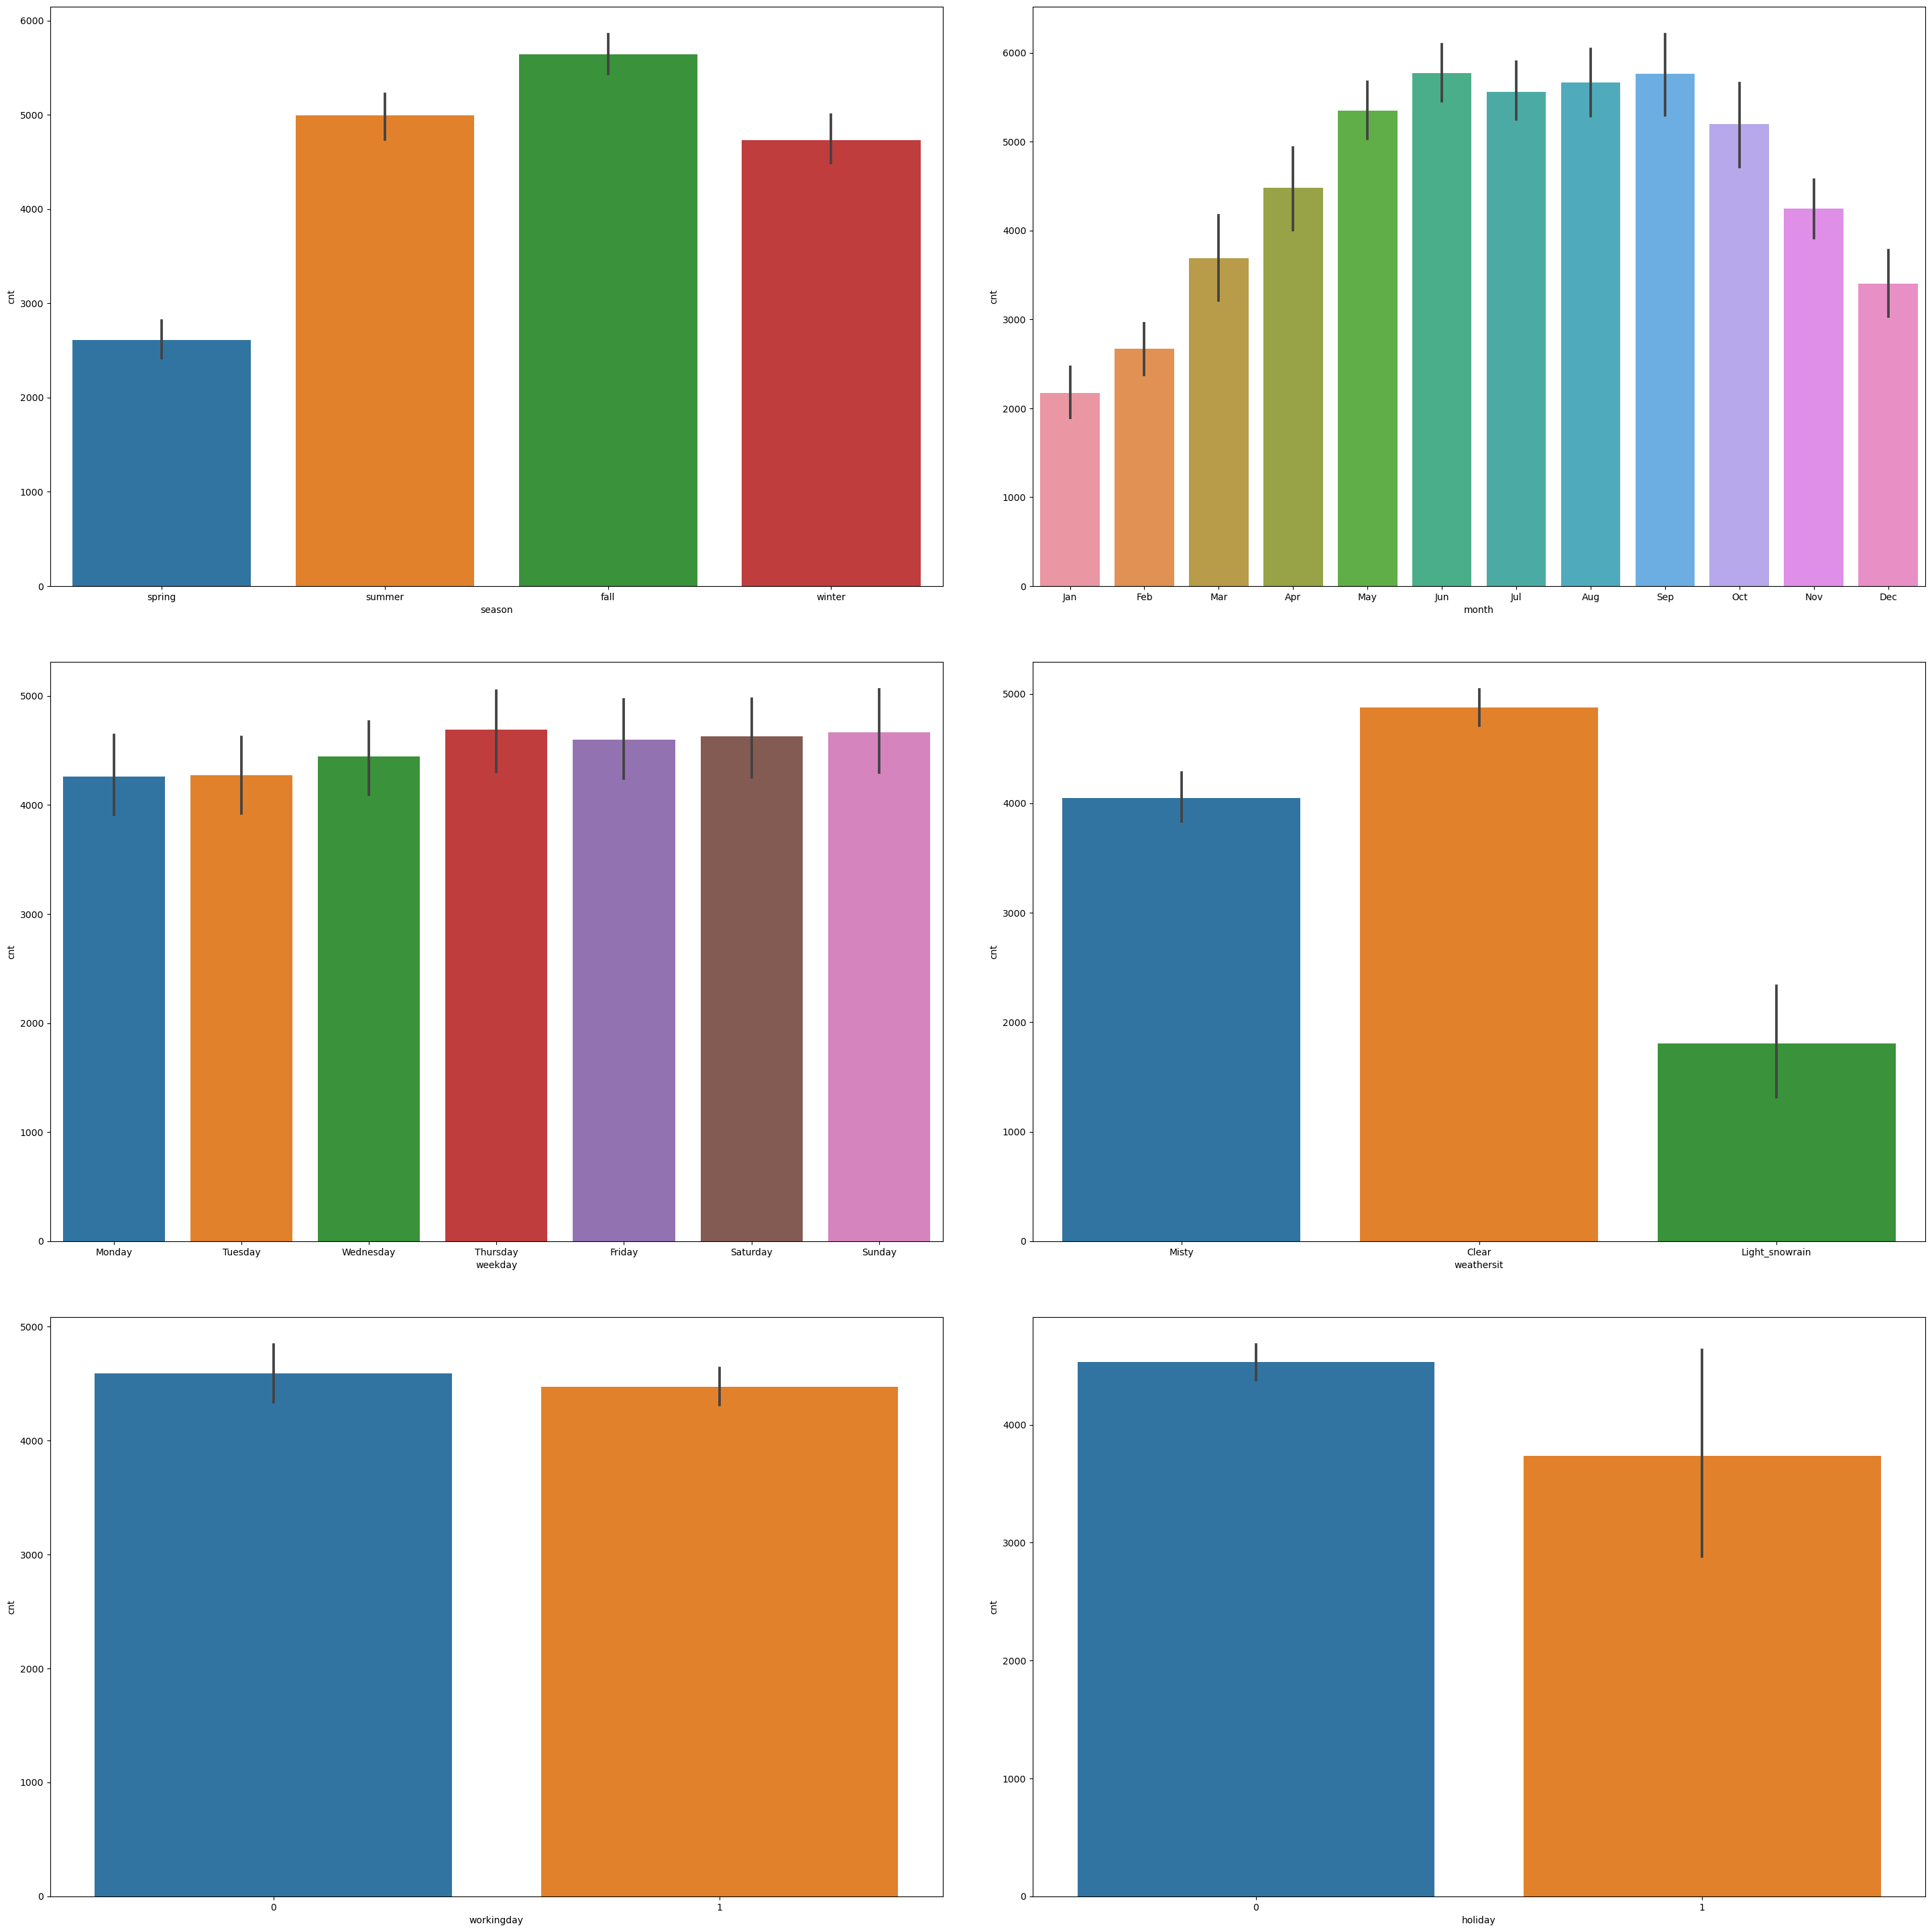

In [47]:
fig, axes = plt.subplots(3, 2,figsize=(30,30))

for item,ax in zip(list_categorical,axes.flatten()):
    
    sns.barplot(data=inp1,y=inp1["cnt"],x=inp1[item],ax=ax)
    ax.set_xlabel(item)

fig.tight_layout(pad=5.0)    
plt.show()

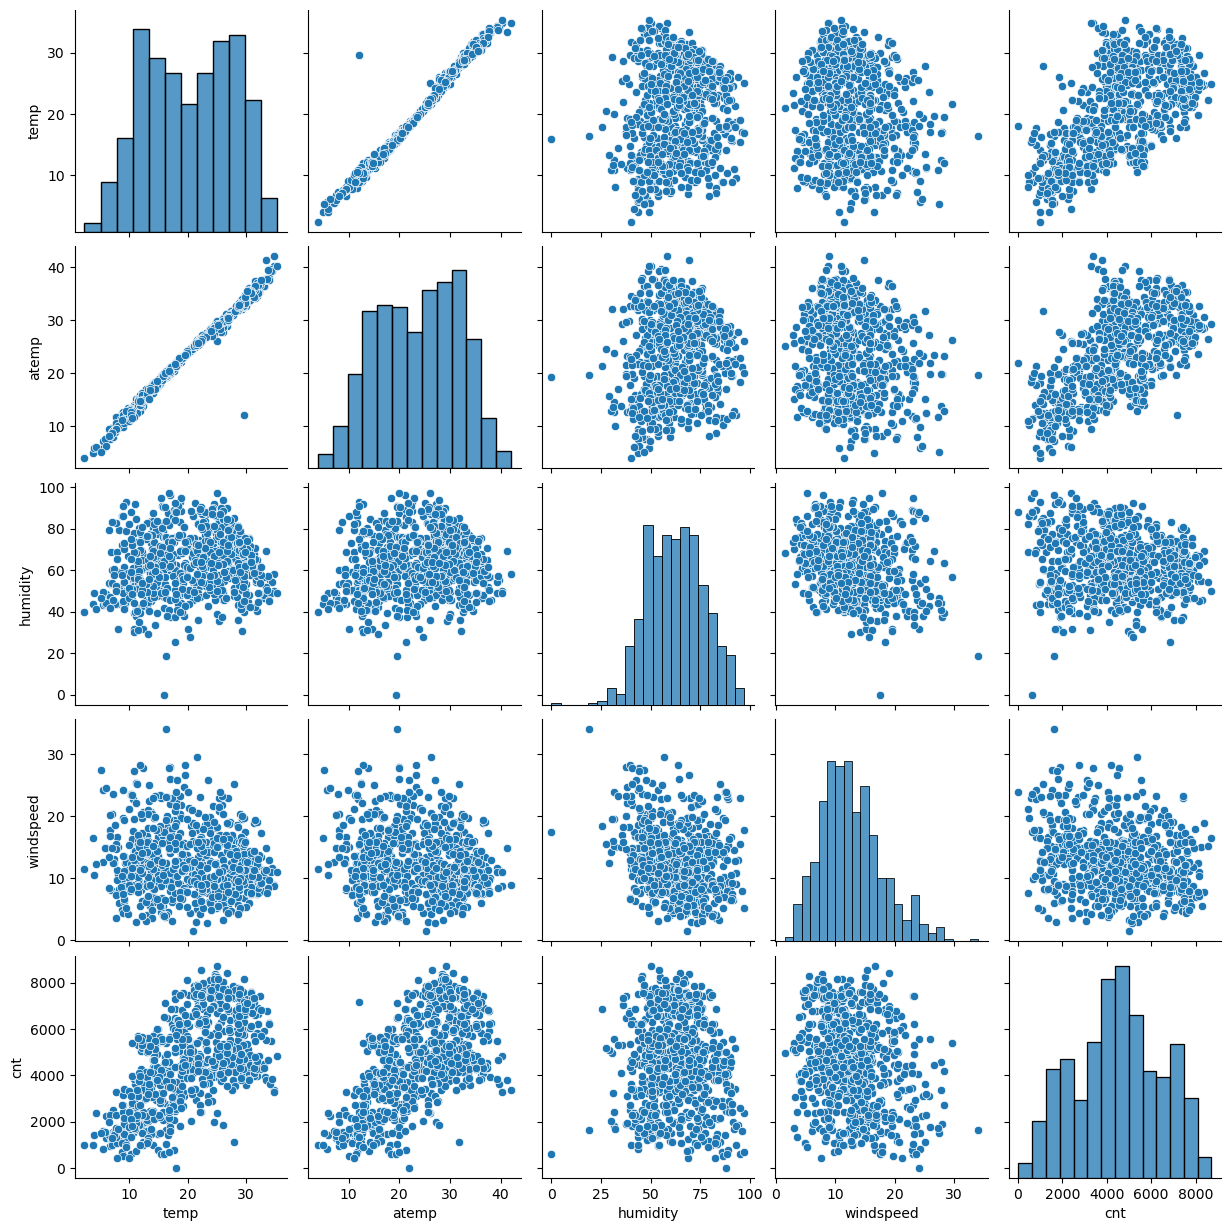

In [48]:
# Analysing/visualizing the numerical columns

sns.pairplot(data=inp1,vars=['temp','atemp','humidity','windspeed','cnt'])
plt.show()

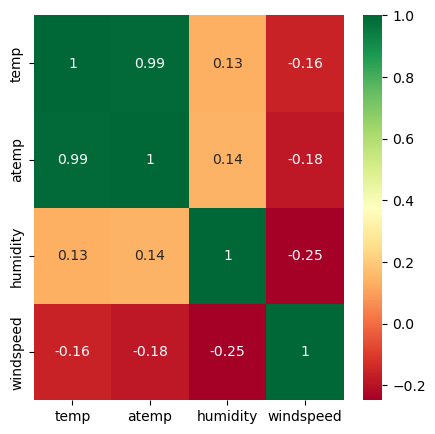

In [52]:
# Checking the correlation between the numerical variables

plt.figure(figsize = (5, 5))
sns.heatmap(inp1[list_numerical].corr(), annot = True, cmap="RdYlGn")
plt.show()

#### There is linear relationship between temp and atemp. Both of the parameters cannot be used in the model due to multicolinearity. We will decide which parameters to keep based on VIF and p-value w.r.t other variables

#### Data Preparation  

In [55]:
# Dummy variable creation for month, weekday, weathersit and season variables.

status_weekday = pd.get_dummies(inp1['weekday'],drop_first=True)
status_season = pd.get_dummies(inp1['season'],drop_first=True)
status_month = pd.get_dummies(inp1['month'],drop_first=True)
status_weathersit = pd.get_dummies(inp1['weathersit'],drop_first=True)

In [56]:
# Merging  the dataframe, with the dummy variable dataset. 

inp1 = pd.concat([inp1,status_month, status_season, status_weekday, status_weathersit],axis=1)

In [57]:
inp1.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,atemp,humidity,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
0,spring,0,Jan,0,Monday,1,Misty,14.110847,18.18125,80.5833,...,0,0,1,0,0,0,0,0,0,1
1,spring,0,Jan,0,Tuesday,1,Misty,14.902598,17.68695,69.6087,...,0,0,0,0,0,0,1,0,0,1
2,spring,0,Jan,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,0,1,0,0
3,spring,0,Jan,0,Thursday,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,1,0,0,0,0
4,spring,0,Jan,0,Friday,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,0,0,0


In [58]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 34 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   season          730 non-null    object 
 1   year            730 non-null    int64  
 2   month           730 non-null    object 
 3   holiday         730 non-null    int64  
 4   weekday         730 non-null    object 
 5   workingday      730 non-null    int64  
 6   weathersit      730 non-null    object 
 7   temp            730 non-null    float64
 8   atemp           730 non-null    float64
 9   humidity        730 non-null    float64
 10  windspeed       730 non-null    float64
 11  cnt             730 non-null    int64  
 12  Aug             730 non-null    uint8  
 13  Dec             730 non-null    uint8  
 14  Feb             730 non-null    uint8  
 15  Jan             730 non-null    uint8  
 16  Jul             730 non-null    uint8  
 17  Jun             730 non-null    uin

In [59]:
# dropping unnecessary columns as we have already created dummy variable out of it.

inp1.drop(['season','month','weekday','weathersit'], axis = 1, inplace = True)

In [60]:
inp1.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
inp1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            730 non-null    int64  
 1   holiday         730 non-null    int64  
 2   workingday      730 non-null    int64  
 3   temp            730 non-null    float64
 4   atemp           730 non-null    float64
 5   humidity        730 non-null    float64
 6   windspeed       730 non-null    float64
 7   cnt             730 non-null    int64  
 8   Aug             730 non-null    uint8  
 9   Dec             730 non-null    uint8  
 10  Feb             730 non-null    uint8  
 11  Jan             730 non-null    uint8  
 12  Jul             730 non-null    uint8  
 13  Jun             730 non-null    uint8  
 14  Mar             730 non-null    uint8  
 15  May             730 non-null    uint8  
 16  Nov             730 non-null    uint8  
 17  Oct             730 non-null    uin

In [62]:
inp1.shape

(730, 30)

#### Splitting the Data into Training and Testing Sets

In [271]:
# splitting the dataframe into Train and Test

np.random.seed(0)
df_train, df_test = train_test_split(inp1, train_size = 0.7, random_state = 100)

In [272]:
df_train.shape

(510, 30)

In [273]:
df_test.shape

(220, 30)

#### Using MinMaxScaler to Rescaling the features 

In [274]:
list_numerical = ['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

In [275]:
list_numerical

['temp', 'atemp', 'humidity', 'windspeed', 'cnt']

In [276]:
scaler_obj = MinMaxScaler()

In [277]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables

df_train[list_numerical] = scaler_obj.fit_transform(df_train[list_numerical])

In [278]:
df_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,1,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0.191095,0,0,...,1,0,0,0,1,0,0,0,0,1


In [279]:
df_train.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537440,0.513156,0.650480,0.320883,0.513499,0.096078,0.084314,...,0.247059,0.247059,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294,0.029412,0.345098
std,0.500429,0.157763,0.453386,0.225858,0.212410,0.145846,0.169803,0.224421,0.294988,0.278131,...,0.431725,0.431725,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373,0.169124,0.475867
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.542596,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


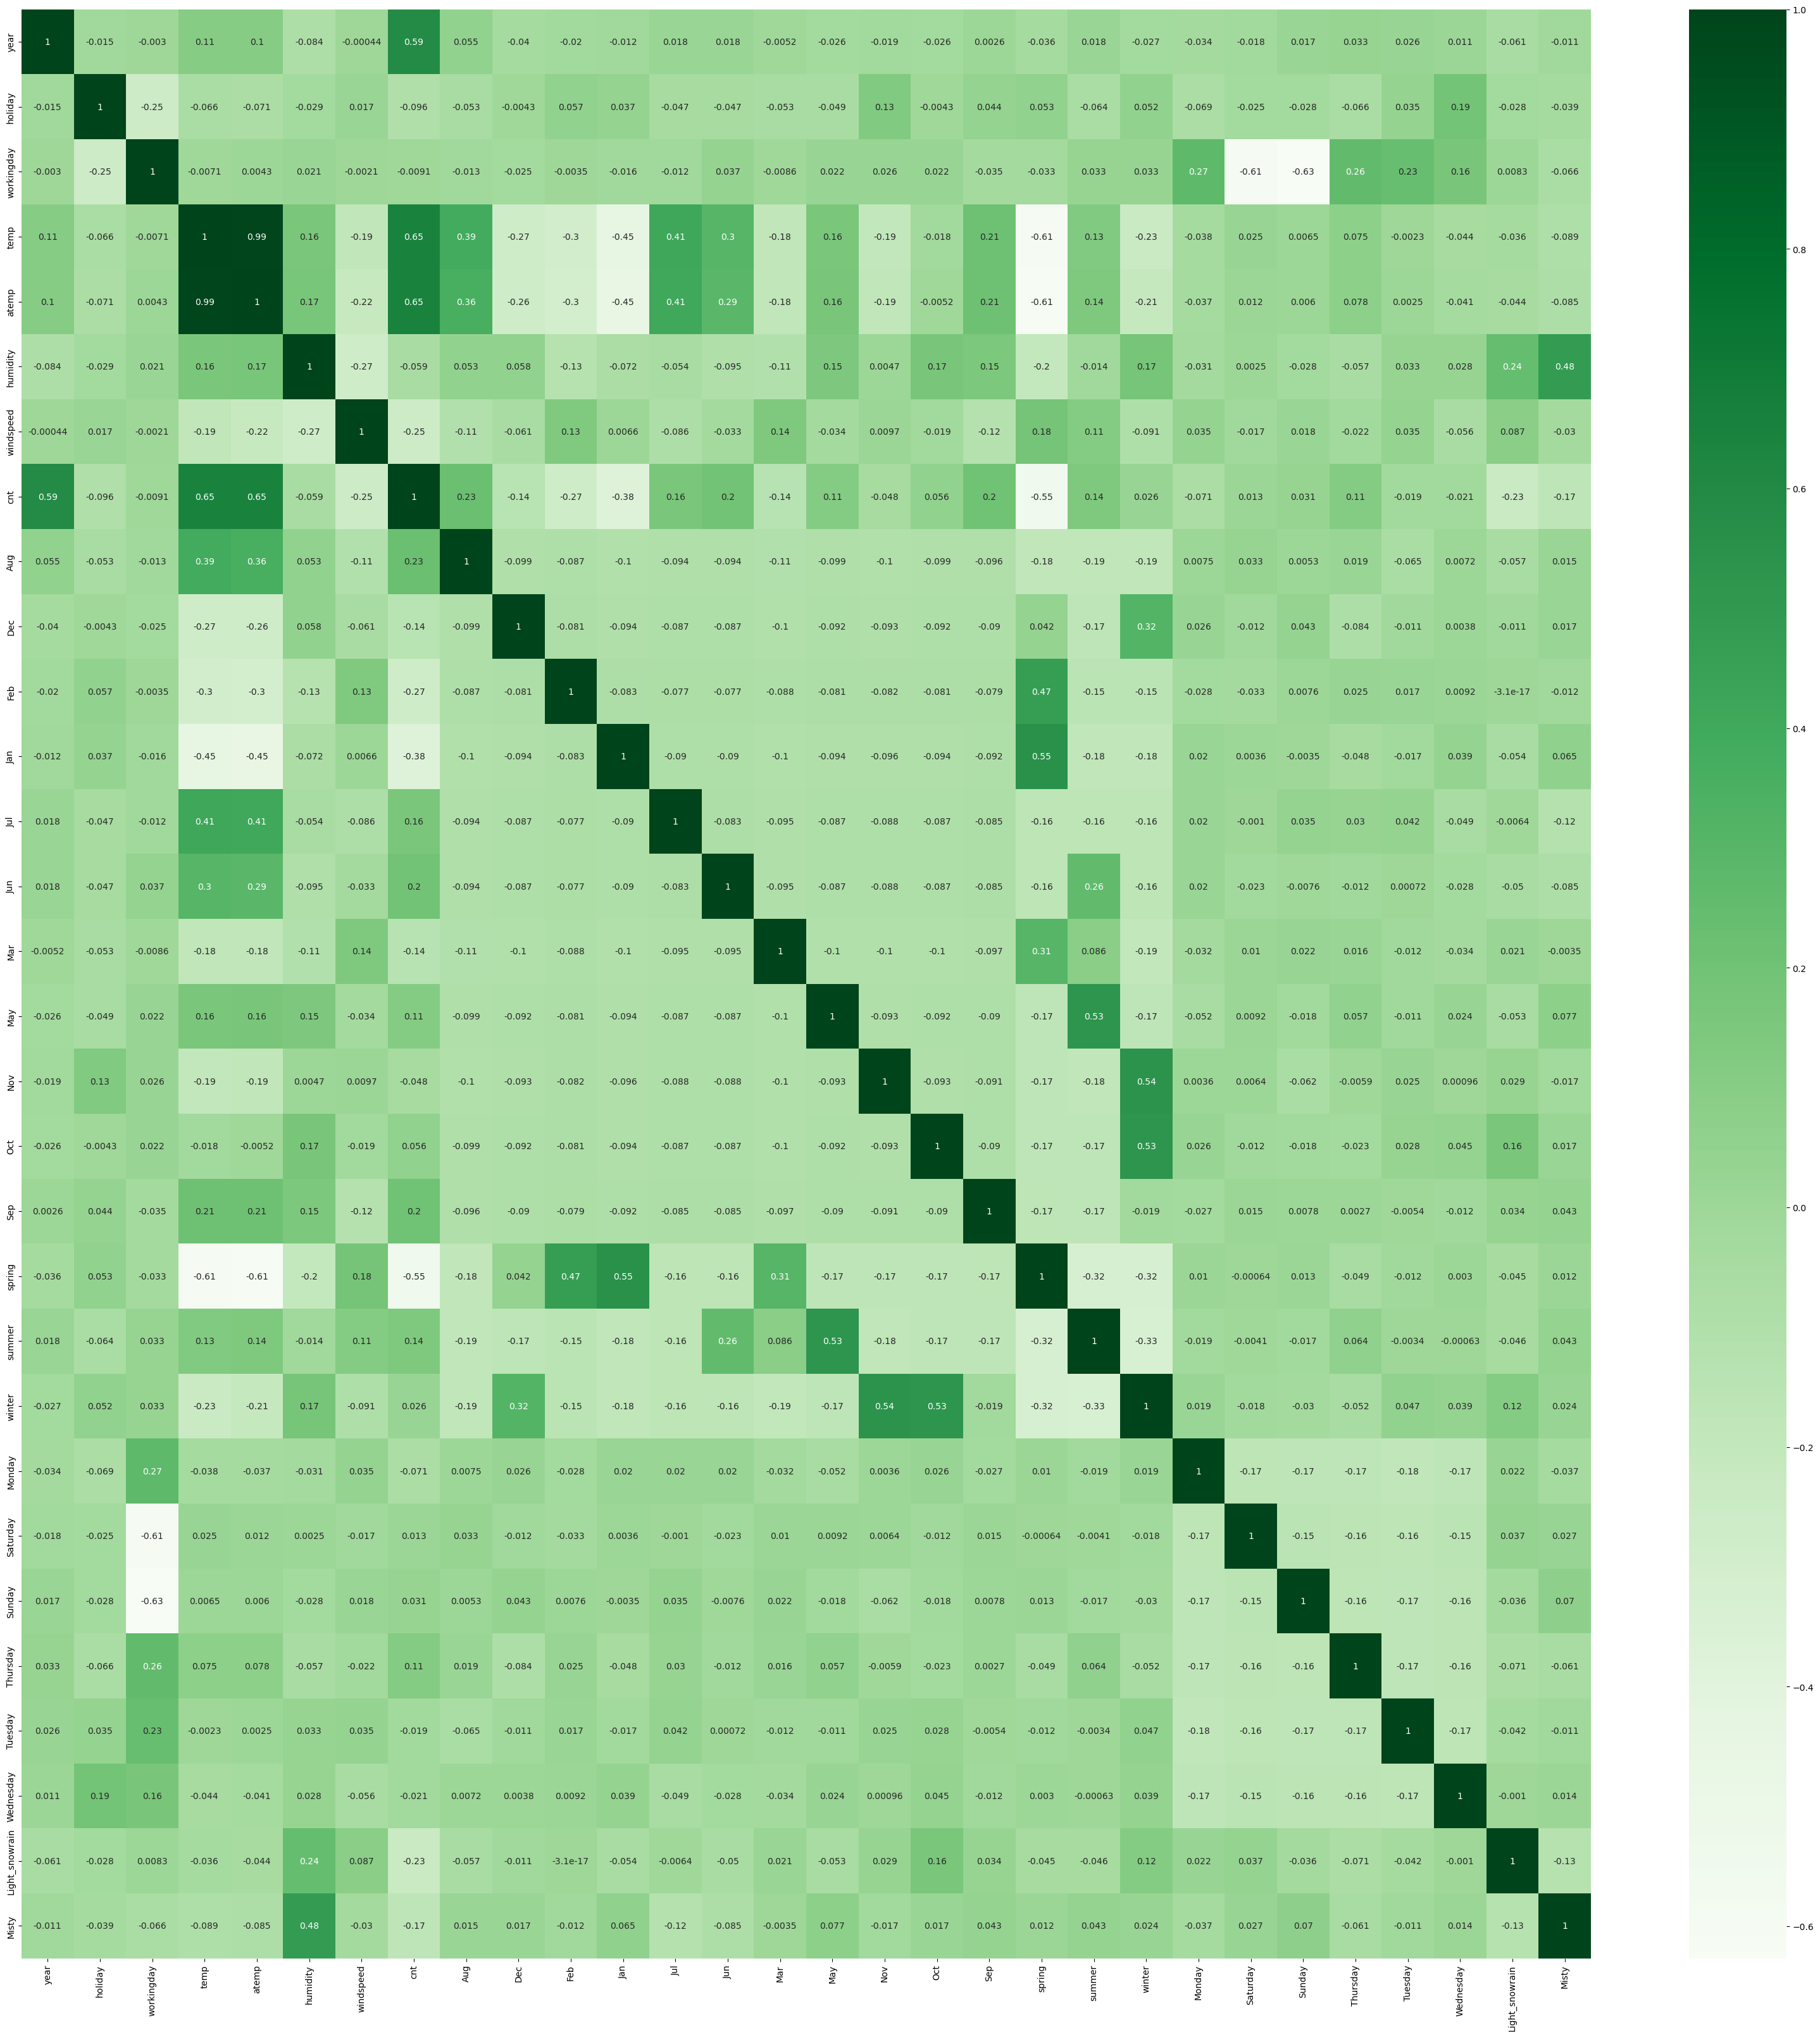

In [280]:
# check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize=(40,40))
sns.heatmap(df_train.corr(),cmap="Greens",annot=True)
plt.show()

#### cnt seems to have correlation with year variable and temp. Similarly, Misty and humidity show correlation. Spring season with Jan and Feb month, Summer season with may month and Winter season with oct and nov month show good correlation.

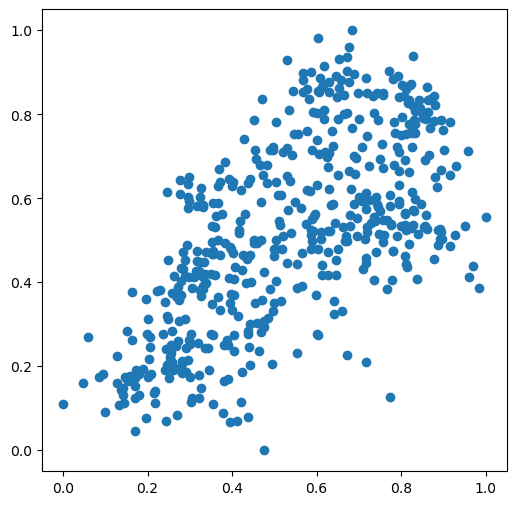

In [281]:
# Visualizing one of the correlation to see the trends via Scatter plot.

plt.figure(figsize=[6,6])
plt.scatter(df_train.temp, df_train.cnt)
plt.show()

In [282]:
# Defining X and y for the model

y_train = df_train.pop('cnt')
X_train = df_train

In [283]:
X_train.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,0,0,...,1,0,0,0,1,0,0,0,0,1
111,0,0,0,0.345824,0.318819,0.751824,0.380981,0,0,0,...,1,0,0,0,1,0,0,0,0,1


In [284]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: cnt, dtype: float64

#### Bulding Linear Model of Recursive Feature Elimination

In [285]:
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [287]:
# Recursive Feature Elimination

rfe = RFE(lr, n_features_to_select = 15)
rfe = rfe.fit(X_train, y_train)

In [288]:
#List of variables selected in top 15 list

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 3),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Aug', False, 10),
 ('Dec', True, 1),
 ('Feb', False, 2),
 ('Jan', True, 1),
 ('Jul', True, 1),
 ('Jun', False, 12),
 ('Mar', False, 15),
 ('May', False, 9),
 ('Nov', True, 1),
 ('Oct', False, 13),
 ('Sep', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Monday', False, 8),
 ('Saturday', False, 5),
 ('Sunday', False, 6),
 ('Thursday', False, 14),
 ('Tuesday', False, 7),
 ('Wednesday', False, 11),
 ('Light_snowrain', True, 1),
 ('Misty', True, 1)]

In [289]:
# selecting the selected variable via RFE in col list

col = list(X_train.columns[rfe.support_])
print(col)

['year', 'holiday', 'temp', 'humidity', 'windspeed', 'Dec', 'Jan', 'Jul', 'Nov', 'Sep', 'spring', 'summer', 'winter', 'Light_snowrain', 'Misty']


In [290]:
# checking which columns has been rejected

X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Aug', 'Feb', 'Jun', 'Mar', 'May', 'Oct',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

In [291]:
# Function to calculate VIF of variables

def calculateVIF(df):
    vif = pd.DataFrame()
    vif['Features'] = df.columns
    vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif 

In [292]:
# dataframe with RFE selected variables

X_train_main = X_train[col]

In [293]:
X_train_main.head()

,year,holiday,temp,humidity,windspeed,Dec,Jan,Jul,Nov,Sep,spring,summer,winter,Light_snowrain,Misty
576,1,0,0.815169,0.725633,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,1,0,0,0,1
728,1,0,0.245101,0.498067,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.504508,0.188475,0,0,0,0,0,0,1,0,0,1
111,0,0,0.345824,0.751824,0.380981,0,0,0,0,0,0,1,0,0,1


In [294]:
# CaLculating the VIF for X_train_main

calculateVIF(X_train_main)

,Features,VIF
3,humidity,30.89
2,temp,17.79
4,windspeed,4.72
10,spring,4.37
12,winter,4.06
11,summer,2.82
14,Misty,2.32
0,year,2.09
8,Nov,1.85
6,Jan,1.75


#### Humidity have VIF value 

#### Building a linear model 

In [295]:
# Building the first linear model

X_train_lm1 = sm.add_constant(X_train_main)

lm1 = sm.OLS(y_train, X_train_lm1).fit()

print(lm1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     179.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          8.15e-189
Time:                        11:51:41   Log-Likelihood:                 514.19
No. Observations:                 510   AIC:                            -996.4
Df Residuals:                     494   BIC:                            -928.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3197      0.036      8.

In [296]:
# As humidity shows high VIF value we can drop it

X_train_main.drop(['humidity'], axis = 1, inplace = True)

In [297]:
X_train_main.head()

,year,holiday,temp,windspeed,Dec,Jan,Jul,Nov,Sep,spring,summer,winter,Light_snowrain,Misty
576,1,0,0.815169,0.264686,0,0,1,0,0,0,0,0,0,0
426,1,0,0.442393,0.255342,0,0,0,0,0,1,0,0,0,1
728,1,0,0.245101,0.663106,1,0,0,0,0,1,0,0,0,0
482,1,0,0.395666,0.188475,0,0,0,0,0,0,1,0,0,1
111,0,0,0.345824,0.380981,0,0,0,0,0,0,1,0,0,1


In [298]:
# Calculating the VIF

calculateVIF(X_train_main)

,Features,VIF
2,temp,5.17
3,windspeed,4.67
11,winter,2.95
9,spring,2.89
10,summer,2.24
0,year,2.07
7,Nov,1.81
5,Jan,1.66
6,Jul,1.59
13,Misty,1.57


In [299]:
# Building 2nd linear model

X_train_lm2 = sm.add_constant(X_train_main)

lm2 = sm.OLS(y_train, X_train_lm2).fit()

print(lm2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     184.5
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          4.75e-186
Time:                        11:52:03   Log-Likelihood:                 504.85
No. Observations:                 510   AIC:                            -979.7
Df Residuals:                     495   BIC:                            -916.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2450      0.032      7.

In [300]:
# As Dec shows highist P-value we can drop it

X_train_main.drop(['Dec'], axis = 1, inplace = True)

In [301]:
# Calculating the VIF

calculateVIF(X_train_main)

,Features,VIF
2,temp,5.15
3,windspeed,4.67
8,spring,2.76
10,winter,2.28
9,summer,2.24
0,year,2.07
4,Jan,1.61
6,Nov,1.60
5,Jul,1.59
12,Misty,1.56


In [302]:
# Building 3rd linear model

X_train_lm3 = sm.add_constant(X_train_main)

lm3 = sm.OLS(y_train, X_train_lm3).fit()

print(lm3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.93e-186
Time:                        11:53:21   Log-Likelihood:                 501.87
No. Observations:                 510   AIC:                            -975.7
Df Residuals:                     496   BIC:                            -916.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2208      0.031      7.

In [303]:
# As Nov shows highist P-value we can drop it

X_train_main.drop(['Nov'], axis = 1, inplace = True)

In [304]:
# Calculating the VIF

calculateVIF(X_train_main)

,Features,VIF
2,temp,5.13
3,windspeed,4.62
7,spring,2.75
8,summer,2.24
0,year,2.07
9,winter,1.78
4,Jan,1.61
5,Jul,1.59
11,Misty,1.56
6,Sep,1.34


In [305]:
# Building 4th linear model

X_train_lm4 = sm.add_constant(X_train_main)

lm4 = sm.OLS(y_train, X_train_lm4).fit()

print(lm4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     212.3
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          8.14e-187
Time:                        11:53:45   Log-Likelihood:                 501.13
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     497   BIC:                            -921.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.2154      0.030      7.

In [306]:
# As Jan shows highist P-value we can drop it

X_train_main.drop(['Jan'], axis = 1, inplace = True)

In [307]:
# Calculating the VIF

calculateVIF(X_train_main)

,Features,VIF
2,temp,5.09
3,windspeed,4.60
7,summer,2.23
6,spring,2.08
0,year,2.07
8,winter,1.78
4,Jul,1.58
10,Misty,1.55
5,Sep,1.34
9,Light_snowrain,1.08


In [308]:
# Building 5th linear model

X_train_lm5 = sm.add_constant(X_train_main)

lm5 = sm.OLS(y_train, X_train_lm5).fit()

print(lm5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.835
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     229.6
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          5.06e-187
Time:                        11:54:05   Log-Likelihood:                 498.80
No. Observations:                 510   AIC:                            -973.6
Df Residuals:                     498   BIC:                            -922.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1994      0.030      6.

In [309]:
# As July shows highist P-value we can drop it

X_train_main.drop(['Jul'], axis = 1, inplace = True)

In [310]:
# Calculating the VIF

calculateVIF(X_train_main)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
5,spring,1.99
6,summer,1.90
7,winter,1.63
9,Misty,1.55
4,Sep,1.23
8,Light_snowrain,1.08
1,holiday,1.04


In [311]:
# Building 6th linear model

X_train_lm6 = sm.add_constant(X_train_main)

lm6 = sm.OLS(y_train, X_train_lm6).fit()

print(lm6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.833
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     248.4
Date:                Tue, 04 Apr 2023   Prob (F-statistic):          1.47e-186
Time:                        11:54:41   Log-Likelihood:                 494.84
No. Observations:                 510   AIC:                            -967.7
Df Residuals:                     499   BIC:                            -921.1
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.1909      0.030      6.

#### We can cosider the above model i.e lm6, as it seems to have very low multicolinearity between the predictors and the p-values for all the predictors seems to be significant. F-Statistics value of 271.9 (which is greater than 1) states that the overall model is significant 

In [312]:
# Checking the parameters and their coefficient values

lm6.params

const             0.190855
year              0.234132
holiday          -0.096316
temp              0.477737
windspeed        -0.148098
Sep               0.090998
spring           -0.055406
summer            0.062076
winter            0.094476
Light_snowrain   -0.285031
Misty            -0.078741
dtype: float64

#### Residual Analysis of the train data and validation

In [313]:
# Predicting the y values for train data

y_train_pred = lm6.predict(X_train_lm6)

Text(0.5, 0, 'Errors')

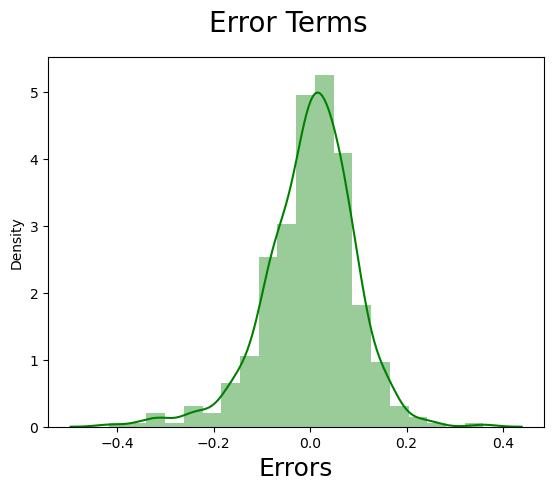

In [314]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), kde=True, bins = 20, color = 'green')
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

#### Error terms are normally distributed 

#### Multi Colinearity 

In [315]:
calculateVIF(X_train_main)

,Features,VIF
3,windspeed,4.60
2,temp,3.84
0,year,2.07
5,spring,1.99
6,summer,1.90
7,winter,1.63
9,Misty,1.55
4,Sep,1.23
8,Light_snowrain,1.08
1,holiday,1.04


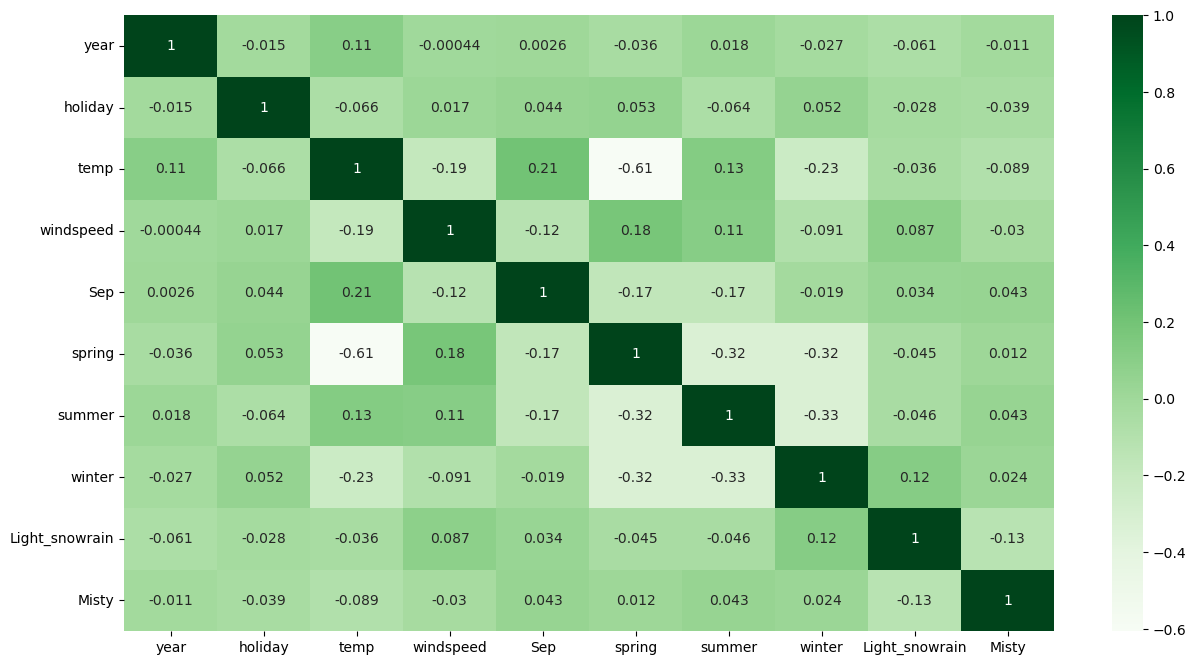

In [316]:
plt.figure(figsize=(15,8))
sns.heatmap(X_train_main.corr(),annot = True, cmap="Greens")
plt.show()

#### Making Predictions

In [317]:
# Applying the scaling on the test sets

df_test[list_numerical] = scaler_obj.transform(df_test[list_numerical])
df_test.head()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,...,1,0,0,1,0,0,0,0,0,0


In [318]:
df_test.describe()

,year,holiday,workingday,temp,atemp,humidity,windspeed,cnt,Aug,Dec,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.640909,0.558718,0.532847,0.638221,0.313293,0.522154,0.059091,0.086364,...,0.263636,0.236364,0.118182,0.172727,0.154545,0.140909,0.122727,0.159091,0.027273,0.318182
std,0.500809,0.187620,0.480828,0.233187,0.217401,0.148694,0.159584,0.219163,0.236333,0.281541,...,0.441609,0.425817,0.323559,0.378873,0.362295,0.348721,0.328872,0.366595,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.529197,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.625590,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.743798,0.402718,0.677750,0.000000,0.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [319]:
y_test = df_test.pop('cnt')
X_test = df_test

In [320]:
y_test

184    0.692706
535    0.712034
299    0.303382
221    0.547400
152    0.569029
         ...   
702    0.757478
127    0.495973
640    0.868615
72     0.232858
653    0.864243
Name: cnt, Length: 220, dtype: float64

In [321]:
X_test

,year,holiday,workingday,temp,atemp,humidity,windspeed,Aug,Dec,Feb,...,summer,winter,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Light_snowrain,Misty
184,0,1,0,0.831783,0.769660,0.657364,0.084219,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.901354,0.842587,0.610133,0.153728,0,0,0,...,1,0,0,0,0,1,0,0,0,0
299,0,0,0,0.511964,0.496145,0.837699,0.334206,0,0,0,...,0,1,0,1,0,0,0,0,0,1
221,0,0,1,0.881625,0.795343,0.437098,0.339570,1,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.817246,0.741471,0.314298,0.537414,0,0,0,...,1,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
702,1,0,1,0.519232,0.511907,0.756118,0.283397,0,1,0,...,0,1,0,0,0,0,0,1,0,0
127,0,0,1,0.584649,0.577380,0.650923,0.069510,0,0,0,...,1,0,0,0,0,0,1,0,0,0
640,1,0,1,0.745598,0.682653,0.817947,0.052115,0,0,0,...,0,1,0,0,0,1,0,0,0,1
72,0,0,1,0.331557,0.332005,0.512107,0.203418,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [323]:
cols_list = list(X_train_main.columns)

In [324]:
X_test = X_test[cols_list]

In [325]:
# Adding constant variable to test dataframe

X_test_lm6 = sm.add_constant(X_test)

In [326]:
# Predicting on test data

y_test_pred = lm6.predict(X_test_lm6)

In [327]:
score = r2_score(y_test, y_test_pred)

In [328]:
score

0.8038195990728842

#### Model Evaluation

Text(0, 0.5, 'y_pred')

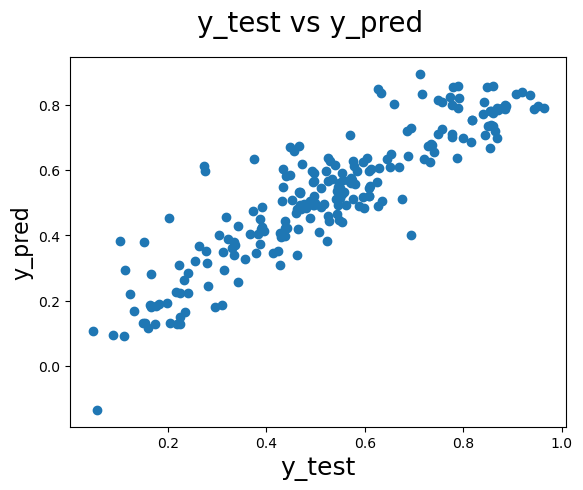

In [329]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16) 

In [330]:
round(lm6.params,4)

const             0.1909
year              0.2341
holiday          -0.0963
temp              0.4777
windspeed        -0.1481
Sep               0.0910
spring           -0.0554
summer            0.0621
winter            0.0945
Light_snowrain   -0.2850
Misty            -0.0787
dtype: float64

#### We can see that the equation of our best fitted line is:
#### cnt = 0.2341×year-0.0963×holidays+0.4777xtemp-0.1482xwindspeed+0.0910×Sep-0.0554×spring+0.0621×summer+0.0945×winter-0.2850×Light_snowrain−0.0787xMisty

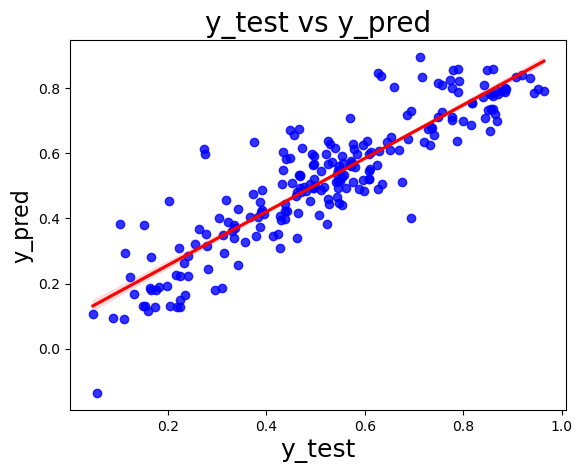

In [331]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

#### Comparision between Training and Testing dataset:
#### - Train dataset R^2          : 0.833
#### - Test dataset R^2           : 0.8038
#### - Train dataset Adjusted R^2 : 0.829    

#### Demand of bikes depend on year, holiday, temp, windspeed, sep, Light_snowrain, Misty, spring, summer and winter.